In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products=pd.read_excel('products.xlsx')

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  40152 non-null  int64 
 1   level1      40152 non-null  object
 2   level2      40152 non-null  object
 3   name        39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [4]:
#Переименую колонки для удобства
products.columns=['product_id', 'category', 'subcategory', 'name']

In [5]:
products[products['name'].isna()]
# Видим что в колонке name много пустых значений

,product_id,category,subcategory,name
821,822,Безалкогольные напитки,Воды питьевые,NaN
1372,1373,Сыры,Мягкие сыры,NaN
2439,2442,Бытовая химия,Средства для уборки,NaN
3277,3281,Гигиена,Средства личной гигиены,NaN
3440,3444,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,NaN
...,...,...,...,...
39801,104104,"Кофе, какао",Кофе,NaN
39866,104714,Безалкогольные напитки,Напитки,NaN
40057,107597,Рынок,Рынок.Сыры,NaN
40065,107897,Молочная продукция,Кисломолочные традиционные продукты,NaN


In [6]:
orders=pd.read_excel('orders.xlsx')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 181.9 KB


In [8]:
# Объединяем таблицы. Я использую inner join
table=pd.merge(products,orders,on='product_id')

Проверяем на наличие пустых и заполнияем значениями похожих по цене, если нет совпадения называем продукт Unknown

In [9]:
table.query("name.isna()")
table.loc[table['subcategory']=='Твердые сычужные сыры','name']=table.loc[table['subcategory']=='Твердые сычужные сыры','name'].fillna('Unknown')
table.loc[table['subcategory']=='Майонез','name']=table.loc[table['subcategory']=='Майонез','name'].fillna('Unknown')
table.loc[table['subcategory']=='Не молочное детское питание','name']=table.loc[table['subcategory']=='Не молочное детское питание','name'].fillna('Unknown')
table.loc[table['subcategory']=='Шоколад','name']=table.loc[table['subcategory']=='Шоколад','name'].fillna('Шоколад Ritter Spor')
table.query("name.isna()")

,product_id,category,subcategory,name,order_id,accepted_at,quantity,regular_price,price,cost_price


In [11]:
popul_category=table.groupby('category').agg(count_unit=('quantity','sum')).reset_index().sort_values('count_unit',ascending=False)

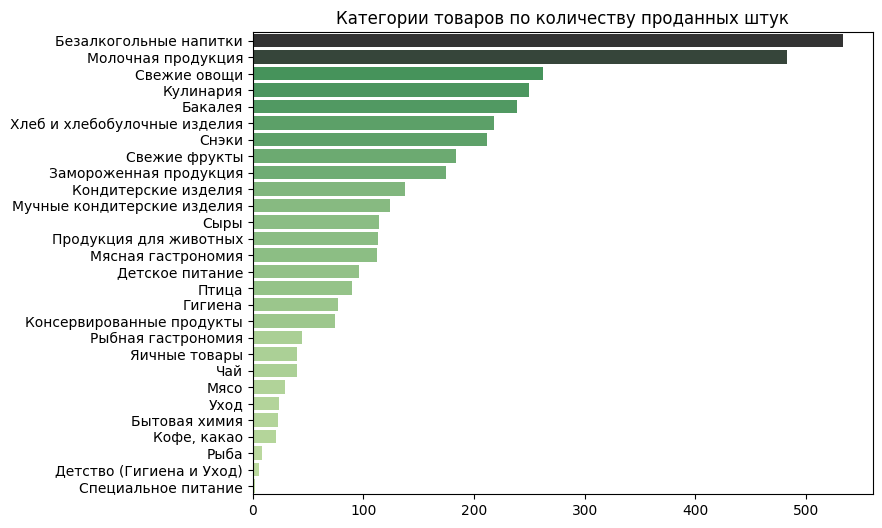

In [12]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=popul_category,y='category',x='count_unit',ax=ax,hue='count_unit',palette='YlGn_d' ,legend=False)
plt.title('Категории товаров по количеству проданных штук')
ax.set_ylabel(None)
ax.set_xlabel(None);

In [ ]:
popul_category_sub=table.groupby(['category','subcategory']).agg(count_unit=('quantity','sum')).reset_index()
popul_category_sub['all_sum']=popul_category_sub.groupby('category')['count_unit'].transform(lambda x:x.sum())


In [14]:
# В моих планах построить распределение значений в рамках категории, но таким образом, чтобы сопоставить с графиком популярности категорий
sorted_df =popul_category_sub.sort_values(by='all_sum', ascending=False )
sorted_df

,category,subcategory,count_unit,all_sum
12,Безалкогольные напитки,Воды питьевые,162,534
13,Безалкогольные напитки,Напитки,252,534
14,Безалкогольные напитки,Соковая продукция,82,534
11,Безалкогольные напитки,Воды минеральные,38,534
59,Молочная продукция,Масло и маргарин,12,483
...,...,...,...,...
50,"Кофе, какао","Какао, горячий шоколад",2,21
73,Рыба,Рыба и морепродукты замороженные,8,8
31,Детство (Гигиена и Уход),Уход за детьми,3,6
30,Детство (Гигиена и Уход),Детская гигиена,3,6


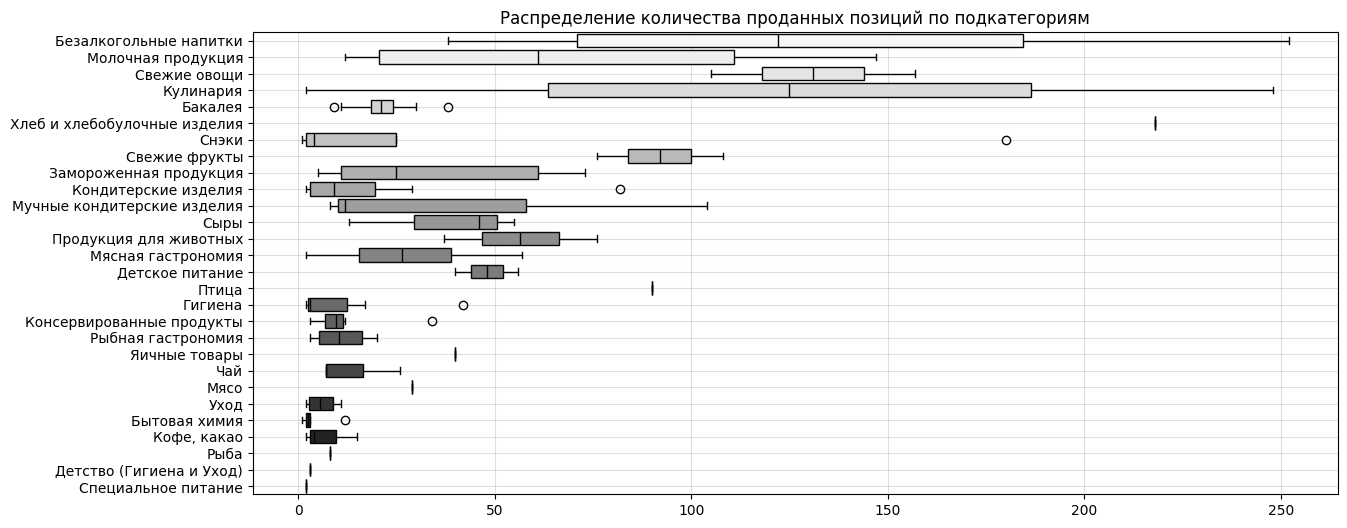

In [15]:
fig,ax1=plt.subplots(figsize=(14,6))
sns.boxplot(data=sorted_df,y='category',x='count_unit',hue='category',palette='binary')
plt.grid(alpha=0.4)
plt.title('Распределение количества проданных позиций по подкатегориям')
plt.ylabel(None)
plt.xlabel(None);


Произведем расчет среднего чека за 13.01.2022

In [16]:
mean_order_13_01_2022=float(table[table['accepted_at'].dt.normalize()==pd.Timestamp('2022-01-13')].groupby('order_id')[['quantity','price']]
      .apply(lambda x:sum(x['quantity']*x['price'])).reset_index()[0].mean().round(2))


text=f"Средний чек за 13.01.2022г. = {mean_order_13_01_2022} рублей"

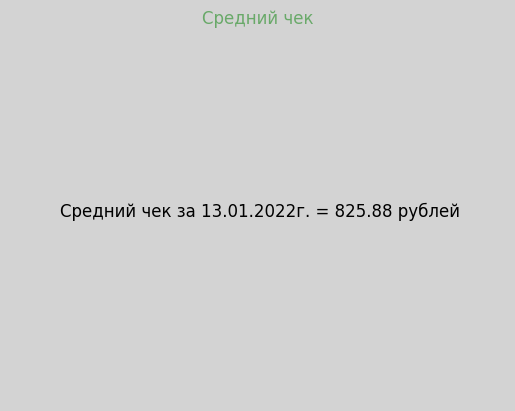

In [17]:
fig,ax=plt.subplots()
fig.set_facecolor('lightgray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.text(0.1,0.5,text,fontsize=12)
plt.title('Средний чек',color='green',alpha=0.5);

In [19]:
table_cheez=table.query("category=='Сыры'")

In [21]:
table_cheez.loc[:,'is_promo']=np.where((table_cheez['regular_price']!=table_cheez['price']),'promo','stand')
promo_table=table_cheez.groupby('is_promo').agg(cnt=('quantity','sum')).reset_index()

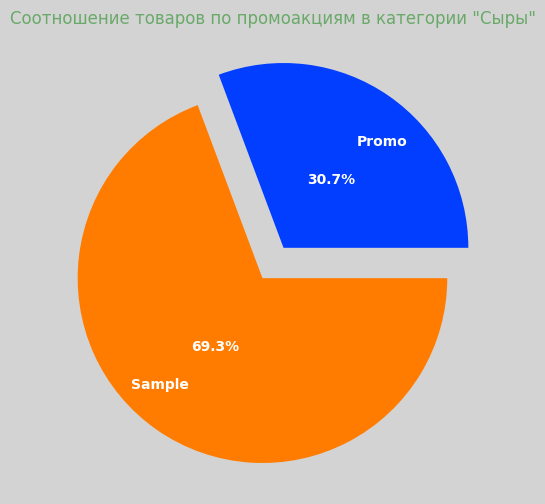

In [22]:
fig,ax1=plt.subplots(figsize=(10,6))
color=sns.color_palette('bright')
fig.set_facecolor('lightgray')
ax1.pie(data=promo_table,x='cnt',labels=['Promo','Sample'], colors=color,autopct='%1.1f%%',explode=[0.1,0.1],labeldistance=0.7
        ,pctdistance=0.45,textprops={'color':'white','fontweight': 'bold'})
plt.title('Соотношение товаров по промоакциям в категории "Сыры"',color='green',alpha=0.5);

In [23]:
table.head(2)

,product_id,category,subcategory,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14


In [24]:
table_margin=(
table.groupby('category')
.apply (lambda d :
pd.Series({'margin_in_rub':((d['price']-d['cost_price'])*d['quantity']).sum(),                                                          
          'margin_in_perc':(((d['price']-d['cost_price'])*d['quantity']).sum()/(d['price']*d['quantity']).sum()*100).round(2)
          
          
          }),include_groups=False).sort_values(by='margin_in_rub',ascending=False).reset_index()                                   

)

In [25]:
table_margin

,category,margin_in_rub,margin_in_perc
0,Безалкогольные напитки,20373.0,44.19
1,Кулинария,18452.0,45.18
2,Замороженная продукция,13099.0,47.26
3,Молочная продукция,12493.0,33.24
4,Мясная гастрономия,10230.0,42.36
5,Снэки,9582.0,42.63
6,Свежие овощи,9006.0,27.11
7,Бакалея,8177.0,37.57
8,Свежие фрукты,7879.0,29.17
9,Сыры,7474.0,37.70


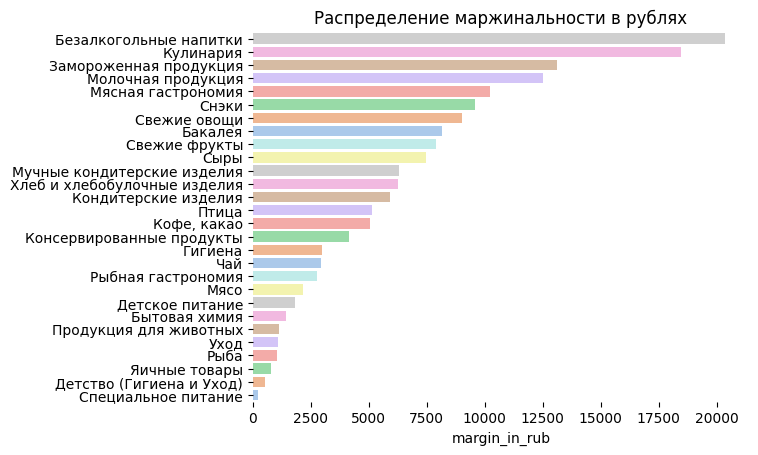

In [26]:
fig,ax=plt.subplots()
sns.barplot(data=table_margin,y='category', x='margin_in_rub',ax=ax,hue='margin_in_rub',palette='pastel',legend=False)
ax.set_frame_on(False)
plt.title('Распределение маржинальности в рублях')
plt.ylabel(None);

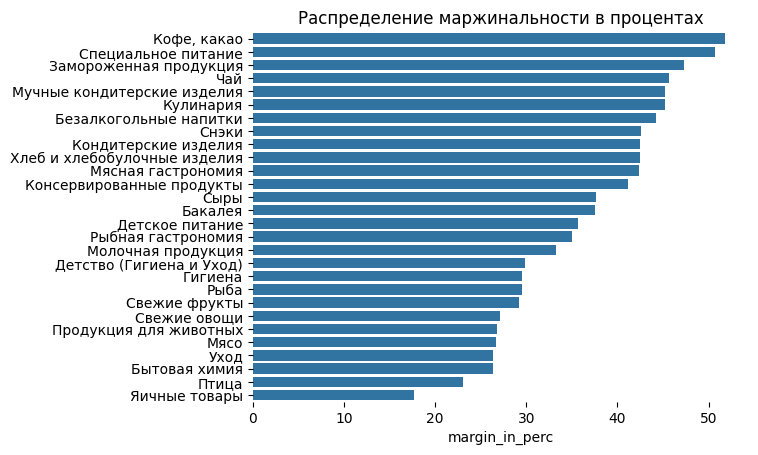

In [27]:
fig,ax=plt.subplots()
sns.barplot(data=table_margin.sort_values(by='margin_in_perc',ascending=False),y='category'
            , x='margin_in_perc',ax=ax,legend=False)
ax.set_frame_on(False)
plt.title('Распределение маржинальности в процентах')
plt.ylabel(None);

In [28]:
table

,product_id,category,subcategory,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14
2,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517368853,2022-01-13 09:34:18,1,18,18,14
3,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517676281,2022-01-13 08:21:53,2,18,18,14
4,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517600286,2022-01-13 14:32:24,4,18,18,14
...,...,...,...,...,...,...,...,...,...,...
3013,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517469469,2022-01-13 15:34:08,1,229,179,89
3014,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517528637,2022-01-13 16:31:16,1,229,179,89
3015,109637,Замороженная продукция,Замороженные полуфабрикаты,Пицца La Trattoria,1517696521,2022-01-13 10:55:53,1,229,179,89
3016,111797,Мясная гастрономия,Колбасы,Колбаса вареная Самокат,1517565373,2022-01-13 12:11:46,1,175,175,97


In [31]:
table_ABC=(
(table.groupby('name').apply(lambda x : pd.Series({'all_cnt':x['quantity'].sum()
                                                  ,'all_sale': (x['price']*x['quantity']).sum()
                                                  }),include_groups=False)).reset_index()

)

In [32]:
table_ABC.head(2)

,name,all_cnt,all_sale
0,Unknown,6,646
1,Авокадо Хасс Artfruit,20,3556


In [33]:
table_ABC[['per_cnt','per_sale']]=table_ABC[['all_cnt','all_sale']]/table_ABC[['all_cnt','all_sale']].sum()

In [34]:
table_ABC['cumsum_cnt']=table_ABC.sort_values(by='per_cnt',ascending=False)['per_cnt'].cumsum()
table_ABC['cumsum_sale']=table_ABC.sort_values(by='per_sale',ascending=False)['per_sale'].cumsum()


In [35]:
#о Приготовим переменные для категоризации товаров и создадим колонки с категориями
cond=[table_ABC[['cumsum_cnt','cumsum_sale']]<=0.8,table_ABC[['cumsum_cnt','cumsum_sale']]<=0.95]
ret=['A','B']
table_ABC[['gr_cnt','gr_sale']]=np.select(cond,ret,default='C')

In [36]:
# Создадим объединенную колонку с помощью join. Будет возможность варировать разделителем
table_ABC['fin_group']= table_ABC[['gr_cnt','gr_sale']].agg(' - '.join,axis=1)

In [41]:
# Посмотрим получившуюся таблицу
table_ABC.sort_values(by='per_cnt',ascending=False,ignore_index=True).head(10)

,name,all_cnt,all_sale,per_cnt,per_sale,cumsum_cnt,cumsum_sale,gr_cnt,gr_sale,fin_group
0,Чипсы Lay's,73,8523,0.019561,0.019076,0.019561,0.041025,A,A,A - A
1,Напиток Coca-Cola,65,6125,0.017417,0.013709,0.036977,0.054733,A,A,A - A
2,Вода Шишкин лес,62,3476,0.016613,0.007780,0.053591,0.112313,A,A,A - A
3,Молоко Простоквашино,55,5009,0.014737,0.011211,0.068328,0.088531,A,A,A - A
4,Бананы,53,5046,0.014202,0.011294,0.082529,0.077320,A,A,A - A
5,Сырок творожный Самокат,49,1630,0.013130,0.003648,0.095659,0.246460,A,A,A - A
6,Батон нарезной Коломенское,46,1902,0.012326,0.004257,0.107985,0.207293,A,A,A - A
7,Вода Сенежская,44,1652,0.011790,0.003697,0.119775,0.242812,A,A,A - A
8,Молоко Самокат,34,2657,0.009110,0.005947,0.128885,0.131926,A,A,A - A
9,Филе грудки ЦБ Петелинка,33,9807,0.008842,0.021949,0.137728,0.021949,A,A,A - A


В довершению проекта соберем мини-дашборд с помощью mosaic

In [ ]:
mosaik=[['A','B'],['C','D'],[None,None],['E','F']]

In [ ]:
print(plt.style.available)

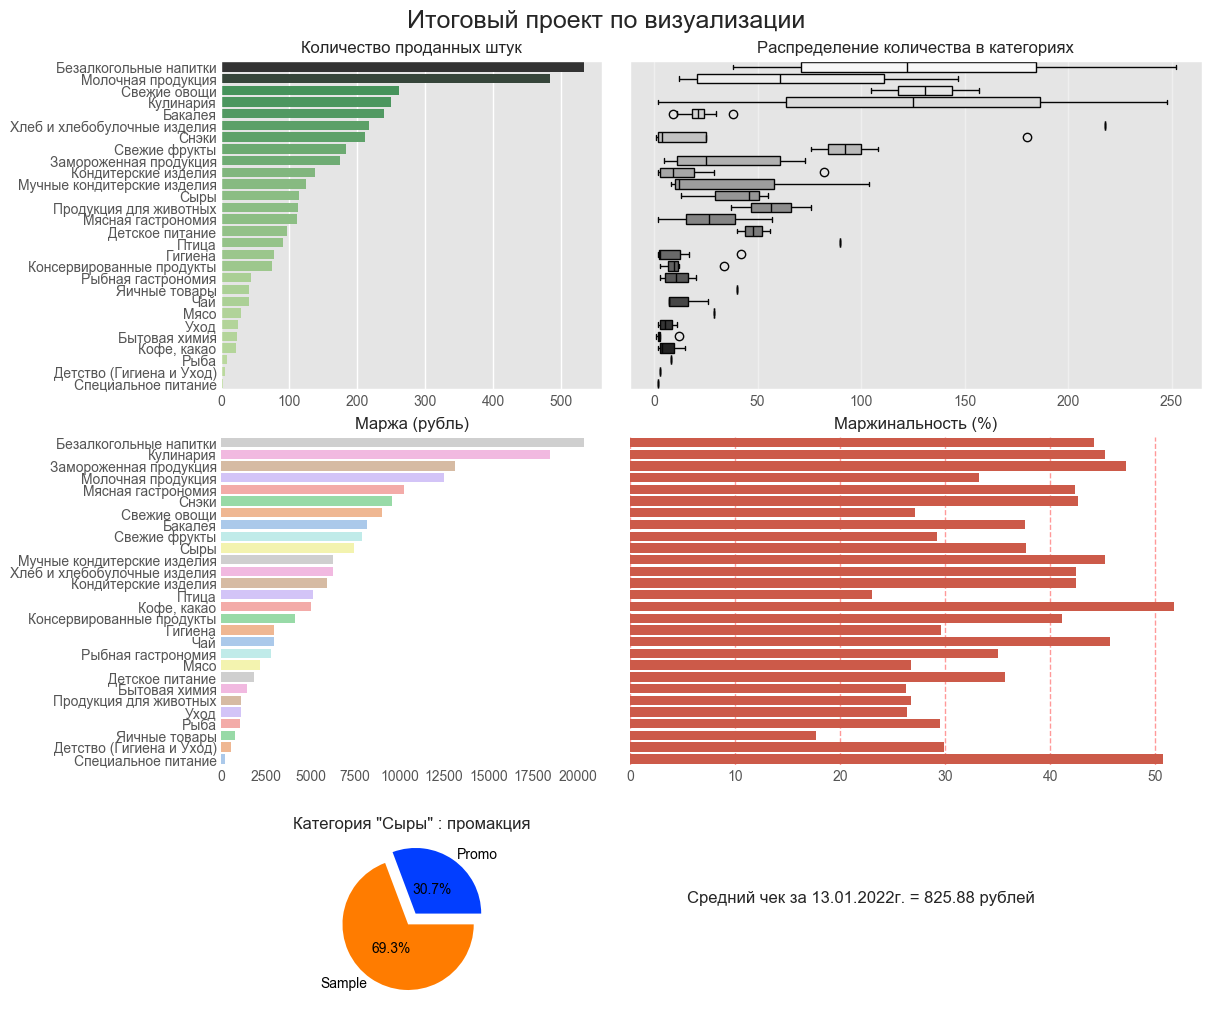

In [162]:

fig,ax=plt.subplot_mosaic(mosaic=mosaik,figsize=(12,10),layout="constrained",height_ratios=[2,2,0.1,1],width_ratios=[1,1.5])
fig.suptitle('Итоговый проект по визуализации',fontsize=18)

ax[None].set_frame_on(False)
ax[None].set_xticks([])
ax[None].set_yticks([])

 

sns.barplot(data=popul_category,y='category',x='count_unit',ax=ax['A'],hue='count_unit',palette='YlGn_d' ,legend=False)
ax['A'].set_title('Количество проданных штук',fontsize=12)
ax['A'].set_ylabel(None)
ax['A'].set_xlabel(None)

sns.boxplot(data=sorted_df,y='category',x='count_unit',hue='category',palette='binary',ax=ax['B'])

ax['B'].set_title('Распределение количества в категориях',fontsize=12)
ax['B'].set_ylabel(None)
ax['B'].set_xlabel(None)
ax['B'].set_yticks([])
ax['B'].grid(alpha=0.4)


ax['F'].set_facecolor('lightgray')
ax['F'].set_xticks([])
ax['F'].set_yticks([])
ax['F'].set_frame_on(False)
ax['F'].text(0.1,0.6,text,fontsize=12)

color=sns.color_palette('bright')
ax['E'].set_facecolor('lightgray')
ax['E'].pie(data=promo_table,x='cnt',labels=['Promo','Sample'], colors=color,autopct='%1.1f%%',explode=[0.1,0.1]
        ,pctdistance=0.45,textprops={'color':'black'})
ax['E'].set_title('Категория "Сыры" : промакция',fontsize=12)

sns.barplot(data=table_margin,y='category', x='margin_in_rub',ax=ax['C'],hue='margin_in_rub',palette='pastel',legend=False)
ax['C'].set_frame_on(False)
ax['C'].set_title('Маржа (рубль)',fontsize=12)
ax['C'].set_ylabel(None)
ax['C'].set_xlabel(None)

sns.barplot(data=table_margin.sort_values(by='margin_in_rub',ascending=False),y='category'
            , x='margin_in_perc',ax=ax['D'],legend=False)
ax['D'].set_frame_on(False)
ax['D'].set_title('Маржинальность (%)',fontsize=12)
ax['D'].set_ylabel(None)
ax['D'].set_xlabel(None)
ax['D'].set_yticks([])
ax['D'].grid(alpha=0.4,color='red',linestyle='--')

plt.savefig('my_plot.png')
